Práctica 1: Regresión lineal
===
Autores: Lidia Concepción Echeverría y Francisco Ponce Belmonte
---

In [1]:
%matplotlib notebook
import csv
import numpy as np
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Carga y muestra de datos.

In [2]:
def carga_csv(filename):
    valores = read_csv(filename,header= None).values
    return valores.astype(float)

In [3]:
val = carga_csv("ex1data1.csv")  
Y = val[:,1]
aux = val[:,0]
aux = np.reshape(aux, ((len(aux),1)))
X = np.insert(aux, 0, np.ones(val.shape[0]), axis=1)
th =np.zeros((2,1))

<IPython.core.display.Javascript object>


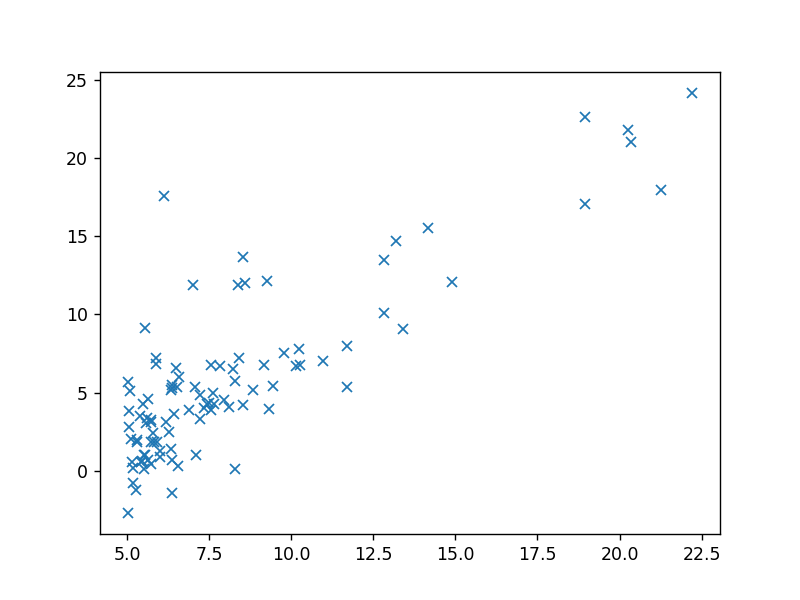

In [4]:
plt.figure()
plt.plot(val[:,0], Y, 'x')

Función que calcula el valor de la hipótesis h.

In [5]:
def H(th,v):
    h = np.dot(v,th)
    return h

Función de coste.

In [6]:
def J(th,x,y):
    h = H(th,x)
    s = np.sum(np.square(np.ravel(h) - y))
    j = s/(2*len(y))
    return j

Implementación método de descenso de gradiente.

In [7]:
def gradiente(th,x,y,alpha = 0.01):
    h = H(th,x)
    s0 = np.sum(np.ravel(h)-y)
    s1 = np.sum((np.ravel(h)-y) * x[:,1])
    th[0] -= (s0*alpha)/len(y)
    th[1] -= (s1*alpha)/len(y)
    return th

Durante las 1500 iteraciones, el valor de theta sufre modificaciones cada vez menores, hasta casi detenerse éstas. Con más iteraciones, el valor terminaría normalizándose llegado un punto.

In [8]:
for i in range(1500):
    th = gradiente(th,X,Y)

Muestra de datos, con 1500 iteraciones y un valor de alfa de 0,01.

<IPython.core.display.Javascript object>


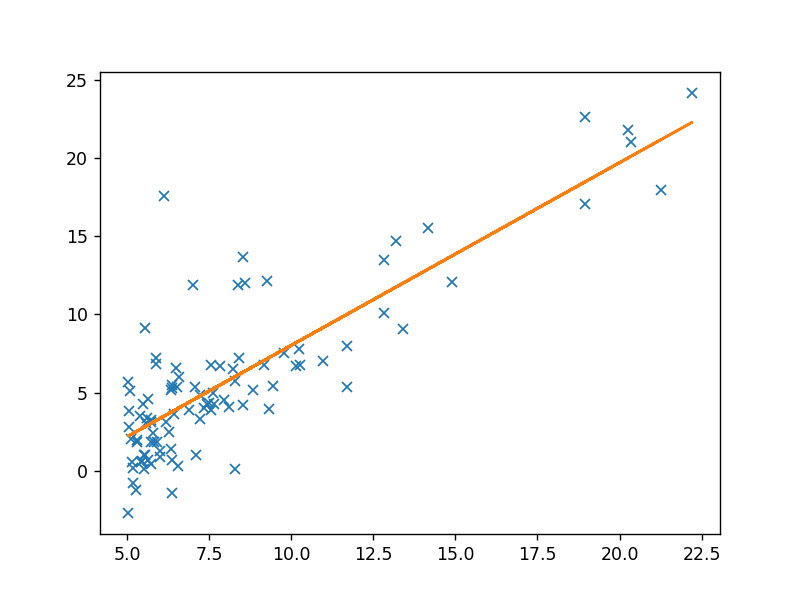

In [9]:
plt.figure()
plt.plot(val[:,0], Y, 'x')
plt.plot(val[:,0],th[0]+th[1]*val[:,0])

Regresión con varias variables
---
Función de normalización de atributos y carga de datos.

In [10]:
def norm(X):
    X_norm = X.copy()
    mu = [np.mean(X[:,0]),np.mean(X[:,1])]
    sigma = [np.std(X[:,0]),np.std(X[:,1])]
    X_norm[:,0] = (X[:,0] - mu[0])/sigma[0]
    X_norm[:,1] = (X[:,1] - mu[1])/sigma[1]
    return X_norm, mu, sigma

In [11]:
val2 = carga_csv("ex1data2.csv")
Y = val2[:,2]
X_norm, mu, sigma = norm(val2[:,:2])
X = np.insert(X_norm, 0, np.ones(val2.shape[0]), axis=1)
th =np.zeros((3,1))

Funciones de coste y de descenso de gradiente (versión vectorizada para soportar varios valores).

In [12]:
def J_varios(th,x,y):
    h = H(th,x)
    aux = np.ravel(h)-y
    aux = np.reshape(aux, ((len(aux),1)))
    j = np.dot(aux.T,aux)/(2*len(y))
    return j[0][0]

In [13]:
def gradiente_varios(th,x,y,alpha = 0.01):
    m = len(y)
    h = np.ravel(H(th,x))
    s0 = np.sum(h - y)
    s1 = np.sum((h - y) * x[:,1])
    s2 = np.sum((h - y) * x[:,2])

    th[0] -= (s0*alpha)/m
    th[1] -= (s1*alpha)/m
    th[2] -= (s2*alpha)/m
    return th

In [14]:
def grad_desc(th,X,Y):
    for i in range(1500):
        th = gradiente_varios(th,X,Y)
    return th[:,0]

Función de cálculo de la ecuación normal.

In [15]:
def inversa (x,y):
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)), x.T), y)

Función de predicción de resultados, dados dos valores y sus pesos.

In [16]:
def prediccion(th, x1, x2):
    return th[0] + th[1]*x1 + th[2]*(np.square(x2))

Como podemos ver, los resultados dados por los cálculos realizados mediante la ecuación normal, y los realizados por la función de descenso de gradiente, son realmente parecidos.

In [17]:
th_i = inversa(X,Y)
th_gr = grad_desc(th,X,Y)
print(prediccion(th_i, 1650, 3))
print(prediccion(th_gr, 1650, 3))

180870071.6407961
180742500.589848


Para finalizar, podemos comprobar los resultados de las predicciones en la siguiente gráfica 3-D. Se puede apreciar que las predicciones realizadas por ambos métodos prácticamente se superponen y dan una estimación muy parecida al valor real del precio.

<IPython.core.display.Javascript object>


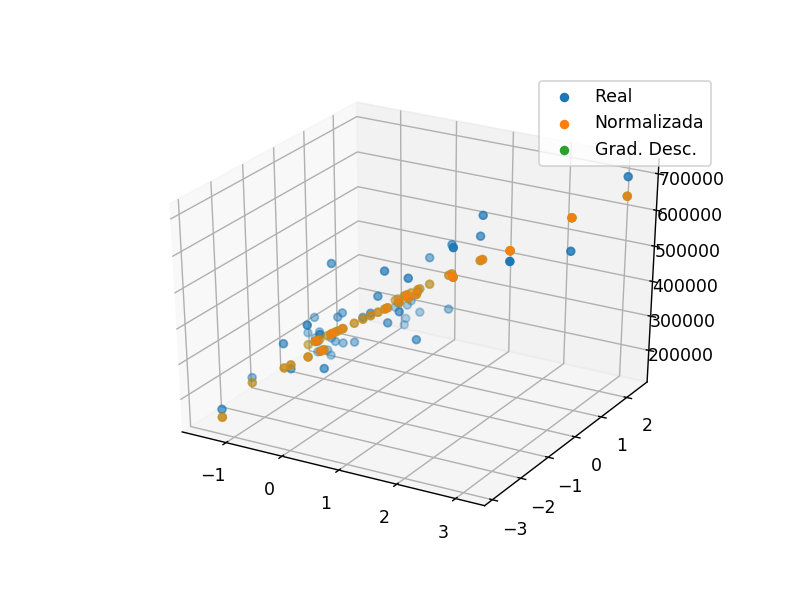

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y)
ax.scatter(X[:,1], X[:,2], prediccion(th_i, X[:,1], X[:,2]))
ax.scatter(X[:,1], X[:,2], prediccion(th_gr, X[:,1], X[:,2]))
ax.legend(['Real', 'Normalizada', 'Grad. Desc.'])